# Regressão - Preço de Venda da Casa

Este notebook realiza um estudo, um conjunto de experimentos, de algoritmos de regressão sobre o dataset [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction). Um conjunto de dados que reúne mais de 21 mil casas e 21 atributos, tais como preço, número de quartos, número de banheiros, andares, nota da casa, entre outros. Nosso objetivo é predizer o valor de uma casa baseado nas características da casa.

> Conteúdo voltado para iniciantes na área de Aprendizado de Máquina e Ciência de Dados!

<a id="top"></a>

## Conteúdo

> **Nota**. Alguns códigos foram ocultados a fim de facilitar a leitura e dar destaque para os conteúdos mais importantes.

O notebook está organizado como segue:

- [Dados](#data) - Carregamento dos dados, pré-processamento.
- [Visualização](#visual) - Análise exploratória dos dados.
- [Regressão](#regression) - Aplicação de algoritmos de Aprendizado de Máquina.
    - [KNN Regressor](#knn) - Regressão com k-NN.
    - [Regressão Linear](#reg) - Regressão com Regressão Linear.
    - [Support Vector Machines](#svm) - Regressão com Support Vector Machines.
    - [Árvore de Decisão](#decision) - Regressão com Decision Tree.
    - [Random Forest](#forest) - Regressão com Random Forest.
    - [Bagging](#bagging) - Regressão com estratégia de Bagging.
    - [Ensemble](#ensemble) - Regressão com estratégia de Ensemble.
    - [AutoML](#automl) - Regressão com Automated Machine Learning.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install auto-sklearn==0.12.0
#!pip install scikit-learn==0.23.2

<a id="data"></a>

-----

# Dados

Esta seção reúne um conjunto de código para carregamento e pré-processamento sobre os dados.

[Voltar para o Topo](#top)


## Carregamento dos Dados

In [3]:
# processamento de dados, algebra linear
import numpy as np 
import pandas as pd

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15230,3754501205,20150429T000000,1085000.0,3,2.50,2840,7500,2.0,0,3,...,11,2840,0,1997,0,98034,47.7049,-122.224,2580,5918
9821,3598600049,20150424T000000,224000.0,1,0.75,840,7203,1.5,0,0,...,6,840,0,1949,0,98168,47.4756,-122.301,1560,8603
16638,1773100430,20150424T000000,313500.0,2,1.50,1270,1282,2.0,0,0,...,8,1000,270,2006,0,98106,47.5581,-122.363,1270,1325


## Seleção dos Dados

Nesta seção observamos os dados e selecionamos apenas aqueles que são interessantes para os modelos de regressão. Além disso, não será proposto nenhum _feature engineer_ para enriquecimento dos dados ou tratamendo dos dados.

**Descrição dos Dados**

[Column defintions - Nova19](https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/207885)

- id - ID unico para cada casa. _(remover)_
- date - Data da casa a venda. _(remover)_
- price - Preço da cada.
- bedrooms - Número de quartos.
- bathrooms - Número de banheiros, no qual .5 conta como lavabo.
- sqft_living - M2 do espaço interior.
- sqft_lot - M2 do espaço do terreno.
- floors - Número de andares.
- waterfront - Tem vista para o mar (1) ou não (0). (categórico)
- view - Valor de 0 a 4 informando se a vista é boa. (categórico)
- condition - Valor de 1 a 5 sobre a condição da casa. (categórico)
- grade - Nota de 1 a 13, no qual 1-3 pequenas construções, 7 construção e desing mediano, e 11-13 para construções de alto nível.
- sqft_above - M2 do interior da casa, acima do nível do solo.
- sqft_basement - M2 do interior da casa, abaixo do nível do solo.
- yr_built - Ano de construção da casa.
- yr_renovated - Último ano de renovação da casa. _(remover)_
- zipcode - CEP da residência. _(remover)_
- lat - Latitude.
- long - Longitude.
- sqft_living15 - M2 do espaço interno para os 15 vizinhos mais próximos.
- sqft_lot15 - M2 do terreno para os 15 vizinhos mais próximos.

In [5]:
columns_to_remove = ['id', 'date', 'yr_renovated', 'zipcode']
df = df.drop(columns_to_remove, axis=1)
df.sample(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
20982,845950.0,5,2.75,4450,9600,2.0,0,0,3,9,3650,800,2014,47.7336,-122.210,4000,9750
13310,435000.0,2,1.00,1060,3036,1.5,0,0,4,6,1060,0,1943,47.6578,-122.324,1730,5535
2549,276000.0,3,2.50,2495,4400,2.0,0,0,3,8,2495,0,2007,47.2877,-122.283,2434,4400


Visualizando a estatística descritiva dos imóveis a venda.

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
lines, columns = df.shape
print('linhas :', lines)
print('colunas:', columns)

linhas : 21613
colunas: 17


## Conjunto de Treinamento e Teste

Nesta seção vamos separa os valores de `X` e `Y`, em seguida normalizar os valores de `X`, por fim, separar entre conjunto de dados de treinamento e teste.

> A normalização se faz necessária, pois alguns algoritmos se beneficiam de valores normalizados, tal como o K-NN.

In [8]:
# recupera os valores (X), e as classes (Y)
X = df.drop('price', axis=1)
Y = df['price']

### Normalização dos Dados

Nesta seção vamos utilizar a normalização [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Esta função de preprocessamento normaliza os dados conforme segue: 

$$x_{new} = \frac{(x - \overline{x})}{\sigma}$$

Ou seja, o novo valor $x_{new}$ é resultado da normalização do $x$, utilizando a média $\overline{x}$ e o desvio padrão $\sigma$.

In [9]:
# normalizador
from sklearn.preprocessing import StandardScaler

In [10]:
# normalização dos dados
min_max_scaler = StandardScaler()
X = min_max_scaler.fit_transform(X)

### Conjuntos de Dados

In [11]:
# treinamento, test split
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=26)

In [13]:
print('treinamento:', len(y_train))
print('teste      :', len(y_test))

treinamento: 17290
teste      : 4323


<a id="visual"></a>

-----

# Visualização dos Dados

Esta seção reúne um conjunto de visualizações sobre os dados.

[Voltar para o Topo](#top)


In [14]:
# visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

### Qual a correlação dos atributos?

`DataFrame.corr()` calcula a correlação de pares de colunas, excluindo `NaN` e valores nulos. Por padrão é computado a [Correlação de Pearson](https://www.statisticssolutions.com/pearsons-correlation-coefficient/), seu coeficiente de correlação mede a relação estatística, ou associação, entre duas variáveis contínuas. 

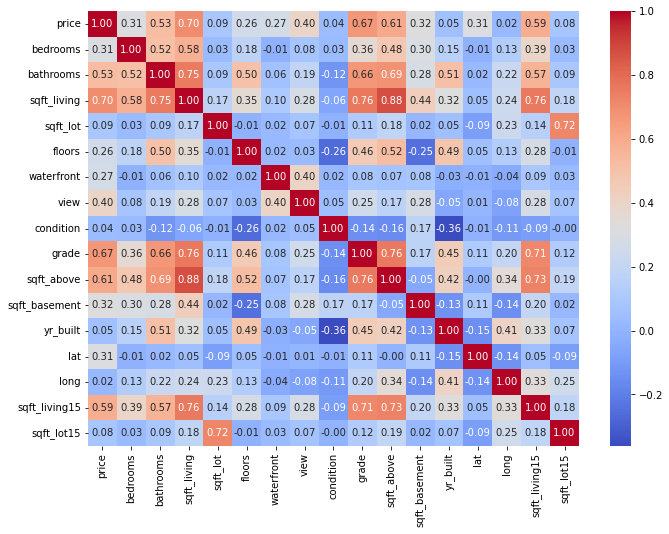

In [15]:
# extraí a correlação dos dados
corr = df.corr(method='pearson')

# heatmap - gráfico de calor
plt.figure(figsize=(11,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
# print(corr)

### Histograma dos Valores por Atributo

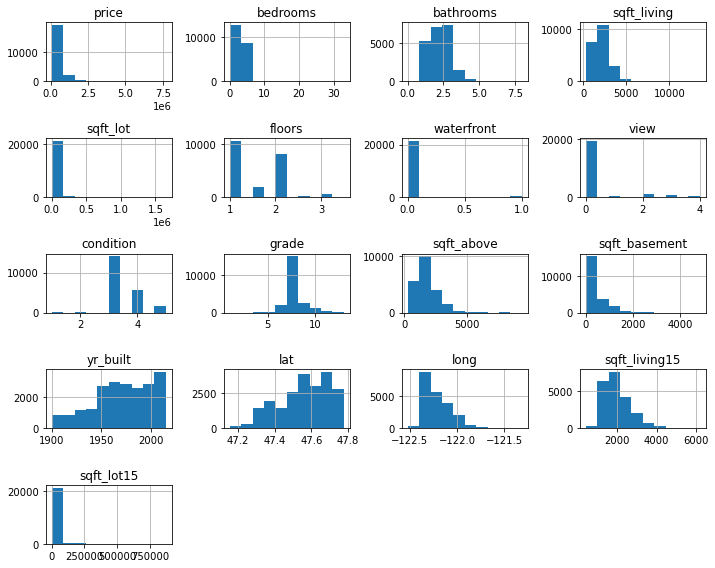

In [16]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

<a id="regression"></a>

-----

# Regressão

Esta seção reúne um conjunto de experimentos. Cada subseção é um algoritmo de Aprendizado de Máquina.


[Voltar para o Topo](#top)

In [17]:
# métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [18]:
# variável de resultado final
# será armazenado o resultado de todos experimentos
experiment = {}

<a id="knn"></a>

## K-NN Regressor

_(k-Nearest Neighbors)_

In [19]:
# regressor
from sklearn.neighbors import KNeighborsRegressor

In [20]:
model1 = KNeighborsRegressor(n_neighbors=3,metric='euclidean')
model1.fit(X_train,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

### Avaliação

In [21]:
y_pred = model1.predict(X_test)

In [22]:
# R Square Error
r2 = r2_score(y_test,y_pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,y_pred)

# Mean Square Error (MSE)
mse = mean_squared_error(y_test,y_pred, squared=True)

# Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_test,y_pred, squared=False)

In [23]:
experiment['KNN'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.7914685420125492
MAE : 93913.16408358394
MSE : 28822069949.951653
RMSE: 169770.63924587093


**Discussão KNN Regressor**   

k-NN obteve um R² próximo de 79%, ou seja, representou bem a função de preços.

-----

<a id="reg"></a>

## Regressão Linear

In [24]:
# regressor
from sklearn.linear_model import LinearRegression

In [25]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

### Avaliação

In [26]:
y_pred = model2.predict(X_test)

In [27]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

In [28]:
experiment['Linear Regression'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.7013037784009919
MAE : 126731.02452905868
MSE : 41284147129.64293
RMSE: 203185.00714777882


**Discussão Regressão Linear**   

Regressão Linear obteve um resultado inferior ao k-NN, com R² de 70%.

-----

<a id="svm"></a>

## Support Vector Machines (SVM)

In [29]:
# regressor
from sklearn.svm import SVR

In [30]:
model3 = SVR()
model3.fit(X_train, y_train)

SVR()

### Avaliação

In [31]:
y_pred = model3.predict(X_test)

In [32]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

In [33]:
experiment['SVM'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : -0.05103875644965217
MAE : 221281.0798586352
MSE : 145268789902.7929
RMSE: 381141.4303153003


**Discussão Support Vector Machines (SVM)**   

SVM não conseguiu nem atinguir o caso médio, pois seu R² está negativo.

-----

<a id="decision"></a>

## Árvore de Decisão

In [34]:
# regressor
from sklearn.tree import DecisionTreeRegressor

In [35]:
model4 = DecisionTreeRegressor(random_state=26)
model4.fit(X_train, y_train)

DecisionTreeRegressor(random_state=26)

### Avaliação

In [36]:
y_pred = model4.predict(X_test)

In [37]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

In [38]:
experiment['Decision Tree'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.7185009693559343
MAE : 100239.12063381911
MSE : 38907246083.49069
RMSE: 197249.1979286372


### Visualização

Nós conseguimos visualizar a árvore de decisão, como as ramificações ocorreram.   
É muito útil para uma apresentação de negócio, em que você consegue explicar a inteligência induzida.

> Não será apresentado neste notebook, pois a árvore aqui construída é muito grande e demora para ser executada.

- Referência: [Visualize a Decision Tree in 4 Ways with Scikit-Learn and Python](https://mljar.com/blog/visualize-decision-tree/)

**Discussão Árvore de Decisão**   

Árvore de Decisão obteve um resultado similar à Regressão Linear, com R² de 71%.

-----

<a id="forest"></a>

## Random Forest

In [39]:
# regressor
from sklearn.ensemble import RandomForestRegressor

In [40]:
model5 = RandomForestRegressor(n_estimators=100, random_state=26)
model5.fit(X_train, y_train)

RandomForestRegressor(random_state=26)

### Avaliação

In [41]:
y_pred = model5.predict(X_test)

In [42]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

In [43]:
experiment['Random Forest'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.8800036556900233
MAE : 70004.7895734829
MSE : 16585234011.305698
RMSE: 128783.67136910524


**Discussão Random Forest**   

Random Forest obteve o melhor resultado até o momento, R² de 88%.   

Além disso, Random Forests são um dos algoritmos mais utilizados em competições de Aprendizado de Máquina.

> **Nota**. Possui alto custo computacional, pois tem que treinar vários modelos.

-----

<a id="bagging"></a>

## Bagging

Regressão com estratégia de Bagging, com algoritmo base Decision Tree.

In [44]:
# ensemble
from sklearn.ensemble import BaggingRegressor

In [45]:
model_base = DecisionTreeRegressor(random_state=26)
model6 = BaggingRegressor(base_estimator=model_base, n_estimators=10, random_state=26)
model6.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=26),
                 random_state=26)

### Avaliação

In [46]:
y_pred = model6.predict(X_test)

In [47]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

In [48]:
experiment['Bagging'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.8655732937558251
MAE : 73561.88618766729
MSE : 18579719184.35621
RMSE: 136307.4436131652


**Discussão Bagging**   

Bagging obteve bons resultados, próximo ao Random Forest.   

> **Nota**. Possui alto custo computacional, pois tem que treinar vários modelos.

-----

<a id="ensemble"></a>

## Ensemble

Regressão com estratégia de Ensemble, utilizando os algoritmos Linear Regression e Random Forest.

In [49]:
# ensemble
from sklearn.ensemble import VotingRegressor

In [50]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=26)

model7 = VotingRegressor([('LR', r1), ('RF', r2)])
model7.fit(X_train, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('RF',
                             RandomForestRegressor(n_estimators=10,
                                                   random_state=26))])

### Avaliação

In [51]:
y_pred = model7.predict(X_test)

In [52]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

In [53]:
experiment['Ensemble'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.8402295578984488
MAE : 87479.02852948575
MSE : 22082590812.090946
RMSE: 148602.12250197152


**Discussão Ensemble**   

Ensemble obteve bons resultados, próximo ao Bagging.   

> **Nota**. Possui alto custo computacional, pois tem que treinar vários modelos.

-----

<a id="automl"></a>

## AutoML

Automated Machine Learning.

In [60]:
# automl
import autosklearn.regression

ModuleNotFoundError: No module named 'autosklearn'

In [56]:
!pip install auto-sklearn

  Using cached auto-sklearn-0.12.0.tar.gz (4.1 MB)

    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Rennan Hecann\\AppData\\Local\\Temp\\pip-install-etixfibj\\auto-sklearn_e69b7068297a429eb387179c9dddb12e\\setup.py'"'"'; __file__='"'"'C:\\Users\\Rennan Hecann\\AppData\\Local\\Temp\\pip-install-etixfibj\\auto-sklearn_e69b7068297a429eb387179c9dddb12e\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Rennan Hecann\AppData\Local\Temp\pip-pip-egg-info-gt0a4zgp'
         cwd: C:\Users\Rennan Hecann\AppData\Local\Temp\pip-install-etixfibj\auto-sklearn_e69b7068297a429eb387179c9dddb12e\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "


  Running setup.py clean for auto-sklearn
  Created wheel for pynisher: filename=pynisher-0.4.2-py3-none-any.whl size=4218 sha256=b6e899efed9820ac6991cb013d7935ba8df4b52a753e2a4799f8053cd52d46d6
  Stored in directory: c:\users\rennan hecann\appdata\local\pip\cache\wheels\aa\f5\90\bdee2c395e95702a631a8b2bc835fdaccb0cf333e0599b1d26
  Running setup.py clean for pyrfr
  Running setup.py clean for scikit-learn
  Created wheel for smac: filename=smac-0.8.0-py3-none-any.whl size=97295 sha256=d6a18cdd6060a35e30b9581127f3f51732202bfee3653f6ef436d2414c4c98df
  Stored in directory: c:\users\rennan hecann\appdata\local\pip\cache\wheels\0e\f7\fe\d902e2c6589bfb41690838ad676c5d0a7907c7ee9a22da5a35
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11731 sha256=ce3e407695199e9975f26cba0449e3c3dabbd95c55a9f71f469e6eb787cc67fe
  Stored in directory: c:\users\rennan hecann\appdata\local\pip\cache\wheels\08\82\8b\5c514221984e88c059b94e36a71d4722e590acaae04deab22e
  Created whee

        raise ValueError(
    ValueError: Detected unsupported operating system: win32. Please check the compability information of auto-sklearn: https://automl.github.io/auto-sklearn/master/installation.html#windows-osx-compatibility
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Rennan Hecann\\AppData\\Local\\Temp\\pip-install-etixfibj\\auto-sklearn_02b8d12bbd544f0b9483154ea292dfd4\\setup.py'"'"'; __file__='"'"'C:\\Users\\Rennan Hecann\\AppData\\Local\\Temp\\pip-install-etixfibj\\auto-sklearn_02b8d12bbd544f0b9483154ea292dfd4\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-b

  copying autosklearn\metalearning\files\f1_micro_multiclass.classification_sparse\feature_runstatus.arff -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\f1_micro_multiclass.classification_sparse
  copying autosklearn\metalearning\files\f1_micro_multiclass.classification_sparse\feature_values.arff -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\f1_micro_multiclass.classification_sparse
  copying autosklearn\metalearning\files\f1_micro_multiclass.classification_sparse\readme.txt -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\f1_micro_multiclass.classification_sparse
  creating build\lib.win-amd64-3.9\autosklearn\metalearning\files\f1_multiclass.classification_dense
  copying autosklearn\metalearning\files\f1_multiclass.classification_dense\algorithm_runs.arff -> build\lib.win-amd64-3.9\autosklearn\metalearning\files\f1_multiclass.classification_dense
  copying autosklearn\metalearning\files\f1_multiclass.classification_dense\configurations.csv -> build\lib

  copying sklearn\utils\random.py -> build\lib.win-amd64-3.9\sklearn\utils
  copying sklearn\utils\setup.py -> build\lib.win-amd64-3.9\sklearn\utils
  copying sklearn\utils\sparsefuncs.py -> build\lib.win-amd64-3.9\sklearn\utils
  copying sklearn\utils\stats.py -> build\lib.win-amd64-3.9\sklearn\utils
  copying sklearn\utils\testing.py -> build\lib.win-amd64-3.9\sklearn\utils
  copying sklearn\utils\validation.py -> build\lib.win-amd64-3.9\sklearn\utils
  copying sklearn\utils\_scipy_sparse_lsqr_backport.py -> build\lib.win-amd64-3.9\sklearn\utils
  copying sklearn\utils\__init__.py -> build\lib.win-amd64-3.9\sklearn\utils
  creating build\lib.win-amd64-3.9\sklearn\utils\sparsetools
  copying sklearn\utils\sparsetools\setup.py -> build\lib.win-amd64-3.9\sklearn\utils\sparsetools
  copying sklearn\utils\sparsetools\__init__.py -> build\lib.win-amd64-3.9\sklearn\utils\sparsetools
  creating build\lib.win-amd64-3.9\sklearn\utils\sparsetools\tests
  copying sklearn\utils\sparsetools\tests\

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/automl/tmp/',
    output_folder='/automl/output/',
)
automl.fit(X_train, y_train, dataset_name='housesalesprediction')

### Avaliação

In [ ]:
y_pred = automl.predict(X_test)

In [ ]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

In [ ]:
experiment['AutoML'] = {'R2':r2, 'MAE':mae, 'MSE':mse, 'RMSE':rmse}

print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

### Visualização

Podemos ver o modelo ou o ensemble de modelos utilizado no AutoML.

> Para isto, utilize o comando `automl.show_models()`.

In [ ]:
automl.show_models()

# Conclusão

Por fim, o melhor algoritmo foi o Random Forest com R² de 88%.   
As demais estratégias de ensemble, Bagging e Ensemble, também apresentaram bons resultados.

In [61]:
# palheta de cores
import seaborn as sns

In [62]:
cm = sns.color_palette('Blues_r', as_cmap=True)
pd.DataFrame(experiment).T.style.background_gradient(subset=['R2'], cmap=cm).highlight_max(subset=['R2'], axis=0)

,R2,MAE,MSE,RMSE
KNN,0.791469,93913.164084,28822069949.951653,169770.639246
Linear Regression,0.701304,126731.024529,41284147129.642929,203185.007148
SVM,-0.051039,221281.079859,145268789902.792908,381141.430315
Decision Tree,0.718501,100239.120634,38907246083.490692,197249.197929
Random Forest,0.880004,70004.789573,16585234011.305698,128783.671369
Bagging,0.865573,73561.886188,18579719184.356209,136307.443613
Ensemble,0.840230,87479.028529,22082590812.090946,148602.122502
